In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import percentileofscore

In [2]:
def find_player_pcts():
  #input player name
  name = input("Player Name: ").strip()
  #input player position
  pos = input("Position (Abbreviated): ").strip()
  pos = pos.upper()
  #makes data frame with filtered to player position
  pos_data = df[df['Position'] == pos]
  if pos_data.empty:
    #will error if the position does not exist in the data
    print(f"No data found for position: {pos}")
  else:
    #next step which is entering height in FIIE format
    height_fiie = input("Height (FIIE): ").strip()
    height_in = FIIE_to_in(height_fiie)
    #makes the range of heights that will be entered can be changed with the range variable
    range_h = 1
    height_upper = height_in+range_h
    height_lower = height_in-range_h
    #makes new data frame filtering for the position data frame for the height range
    pos_height_filter_start = pos_data[pos_data['Height (IN)'] >= height_lower]
    pos_height_filter = pos_height_filter_start[pos_height_filter_start['Height (IN)']<= height_upper]
    if len(pos_height_filter) < 20:
      #If too little records come up after filtering pos and height, it suggests to increase the height range filter
      print("Too little records after filtering for height, try to set a higher range_h")
    else:
      #Input the weight
      weight = float(input("Weight (lbs): ").strip())
      #sets the range to filter weight by can be increased to higher to include all weights
      range_w = 10
      #finds the max and min weights that will be considered when finding percentile
      range_upper = weight+range_w
      range_lower = weight-range_w
      #creates the data frames fully filtered for height weight and position
      pos_height_weight_filter_start = pos_height_filter[pos_height_filter["Weight"]>=range_lower]
      pos_height_weight_filter = pos_height_weight_filter_start[pos_height_weight_filter_start["Weight"]<=range_upper]
      if len(pos_height_weight_filter) <20:
        #prints if too little records are around after filtering weight and suggests to increase it
        print("Too little records when fi.tering weight, try removing weight as a filter or increasing range_w")
      else:
        #Only looks at Juniors
        grade_filter = pos_height_weight_filter[pos_height_weight_filter["Grade"]== "Junior"]
        #Input player stats
        forty_time = 0
        shuttle = 0
        broad_jump = 0
        ten_time = 0
        vert = 0
        LDrill = 0
        forty_time = input("40 Time if recorded: ").strip()
        shuttle = input("Input Shuttle Time if recorded: ").strip()
        broad_jump = input("Input Broad Jump in inches: ").strip()
        ten_time = input("Ten second split if recorded: ").strip()
        vert = input("Recorded Vertical: ").strip()
        LDrill = input("L Drill time if recorded: ").strip()
        #creates a data frame for each stat with only filled in values
        filtered_forty_df = grade_filter[grade_filter["Real40"]>0]
        filtered_shuttle_df = grade_filter[grade_filter["Real Shuttle"]>0]
        filtered_10_df = grade_filter[grade_filter["Ten"]>0]
        filtered_vert_df = grade_filter[grade_filter["Vertical"]>0]
        filtered_LDrill_df = grade_filter[grade_filter["L Drill"]>0]
        filtered_broad_df = grade_filter[grade_filter["Broad (IN)"]>0]
        #finds percentiles for each metric and prints them, only if the metric has a number in it
        if forty_time != '':
          percentile_forty_time = percentileofscore(filtered_forty_df["Real40"].dropna(), float(forty_time), kind='rank')
          print(f"The 40-yard dash time of {forty_time} seconds ranks at {100-percentile_forty_time:.1f}%, group size:",len(filtered_forty_df))
        else:
          print("No valid 40 time entered")
        if shuttle != '':
          percentile_shuttle_time = percentileofscore(filtered_shuttle_df["Real Shuttle"].dropna(), float(shuttle), kind='rank')
          print(f"The shuttle time of {shuttle} seconds ranks at {100-percentile_shuttle_time:.1f}%, group size:",len(filtered_shuttle_df))
        else:
          print("No valid shuttle time entered")
        if broad_jump != '':
          percentile_broad_jump = percentileofscore(filtered_broad_df["Broad (IN)"].dropna(), float(broad_jump), kind='rank')
          print(f"The broad jump of {broad_jump} inches ranks at {percentile_broad_jump:.1f}%, group size:",len(filtered_broad_df))
        else:
          print("No valid ten yard split entered")
        if ten_time != '':
          percentile_ten_time = percentileofscore(filtered_10_df["Ten"].dropna(), float(ten_time), kind='rank')
          print(f"The 10 second split of {ten_time} seconds ranks at {100-percentile_ten_time:.1f}%, group size:",len(filtered_10_df))
        else:
          print("No valid ten yard split entered")
        if vert != '':
          percentile_vert = percentileofscore(filtered_vert_df["Vertical"].dropna(), float(vert), kind='rank')
          print(f"The vertical of {vert} ranks at {percentile_vert:.1f}%, group size:",len(filtered_vert_df))
        else:
          print("No valid vertical entered")
        if LDrill != '':
          percentile_LDrill = percentileofscore(filtered_LDrill_df["L Drill"].dropna(), float(LDrill), kind='rank')
          print(f"The LDrill of {LDrill} seconds ranks at {100-percentile_LDrill:.1f}%, group size:",len(filtered_LDrill_df))
        else:
          print("No valid L Drill entered")
        #PERCENTILES
        percentiles = {}

        #exclude blanks
        if forty_time not in ['', None]:
          percentiles["40YD"] = 100 - percentile_forty_time

        if shuttle not in ['', None]:
         percentiles["Shuttle"] = 100 - percentile_shuttle_time

        if broad_jump not in ['', None]:
         percentiles["Broad Jump"] = percentile_broad_jump

        if ten_time not in ['', None]:
          percentiles["10YD Split"] = 100 - percentile_ten_time

        if vert not in ['', None]:
          percentiles["Vertical"] = percentile_vert

        if LDrill not in ['', None]:
         percentiles["L Drill"] = 100 - percentile_LDrill

        #Bar chart
        measurables = list(percentiles.keys())
        values = list(percentiles.values())

        plt.figure(figsize=(6, 4))
        bars = plt.bar(measurables, values, color='maroon')
        plt.ylim(0, 100)
        plt.ylabel('Percentile')
        plt.title(f"{name} ({height_fiie}, {weight}lbs) Measurable Percentiles")

        #Labels
        for bar in bars:
          yval = bar.get_height()
          plt.text(bar.get_x() + bar.get_width()/2.0, yval + 2, f'{yval:.1f}%', ha='center', va='bottom')

        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
        print(name)


In [6]:
df = pd.read_csv('/content/UCReportData.csv')
df.head()

,Date,Camp,Class,State,Position,Last,First,Full Name,Projection,High School,...,Vertical,Broad Jump,Hand,Arm,SPARQ,Jersey,Grade,Height (IN),Real40,Real Shuttle
0,2018-02-18,UA OH,2019,PA,WR,Hart,Rahmon,Rahmon Hart,Power 5,Imani Christian Academy,...,26.3,NaN,9.43,36.0,NaN,NaN,Junior,73.0,4.73,4.51
1,2018-04-29,Z Charlotte,2019,NC,CB,Gilbert,Quayon,Quayon Gilbert,Group of 5,Thomasville High School,...,26.3,9-8,NaN,NaN,NaN,NaN,Junior,72.0,4.59,4.39
2,2018-03-31,Z Baltimore,2020,VA,ATH,Ellison,Justice,Justice Ellison,Group of 5,Flint Hill High School,...,29.3,8-5,NaN,NaN,NaN,NaN,Sophomore,68.0,4.44,4.65
3,2018-04-14,Z Atlanta,2020,GA,RB,Wingfield,David,David Wingfield,FCS,Eagles Landing Christian Academy,...,27.9,9-3,NaN,NaN,NaN,NaN,Sophomore,67.0,4.50,4.49
4,2021-06-12,21GaMVP,2023,GA,ATH,Copeland,Caden,Caden Copeland,Not Rated,Adairsville High School,...,NaN,9-1,NaN,NaN,NaN,0.0,Sophomore,67.3,4.43,NaN


In [4]:
def FIIE_to_in(fiie):
  fiiestr = str(fiie)
  feet = fiiestr[0]
  inches = fiiestr[1:3]
  eigths = fiiestr[3]
  ht_in = float(feet)*12+float(inches)+float(eigths)/8
  return ht_in


Player Name: zach
Position (Abbreviated): wr
Height (FIIE): 5110
Weight (lbs): 180
40 Time if recorded: 4.5
Input Shuttle Time if recorded: 4.3
Input Broad Jump in inches: 100
Ten second split if recorded: 
Recorded Vertical: 
L Drill time if recorded: 
The 40-yard dash time of 4.5 seconds ranks at 95.5%, group size: 374
The shuttle time of 4.3 seconds ranks at 71.8%, group size: 420
The broad jump of 100 inches ranks at 28.3%, group size: 219
No valid ten yard split entered
No valid vertical entered
No valid L Drill entered


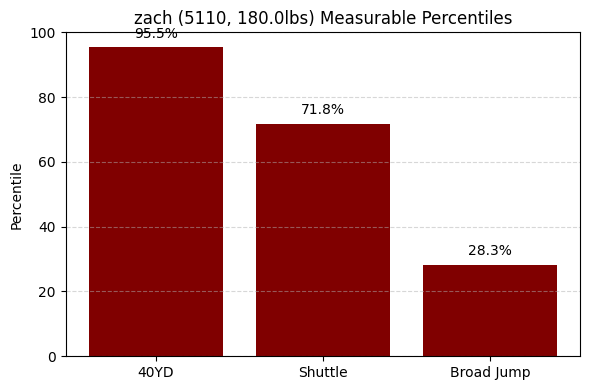

zach


In [5]:
find_player_pcts()